                                                     
 
  Problem taken from Luyben
 
  Author
  Ali Gabriel Lara
 
  Date: May 2014
  Revision: None
 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
def system(x, p):
    ca, cb, cc, cd = x
    vr, kf, kr, fao, cao, fbo, cbo = p

    ft = fao + fbo 

    rf = kf*ca*cb 
    rr = kr*cc*cd 
    R = rf - rr
    
    ca = fao*cao - ft*ca - vr*R 
    cb = fbo*cbo - ft*cb - vr*R 
    cc = ft*cc + vr*(-R) 
    cd = ft*cd + vr*(-R) 
    return [ca, cb, cc, cd]

In [4]:
fao = 4.377e-3      # Flujo de alimentacion de A , m^3/s
cao = 8.01          # Concentracion inicial de A , kmol/m^3
fbo = 4.377e-3      # Flujo de alimentacion de B , m^3/s
cbo = 8.01          # Concentracion inicial de B , kmol/m^3
kof = 4.239e6       # Factor preexponencial de reaccion forward, m^3/s/kmol
kor = 3.631e16      # Factor preexponencial de reaccion inversa, m^3/s/kmol
Ef = 69.71e6        # Energia de activacion de reaccion forward, J/kmol
Er = 139.4e6        # Energia de activacion de reaccion inversa, J/kmol

# Initial conditions for Ca, Cb, Cc, Cd
xo = [2, 2, 2, 2]

ft = fao + fbo 
Tini = 300         # Initial tempeture
Tfin = 400         # Final tempeture 

Temperatures = np.linspace(Tini, Tfin, 100) 
Volumes = [50, 100, 200]      # Reactor volumes

In [5]:
Conv = []
for volume in Volumes:
    for temperature in Temperatures:
        kf = kof * np.exp(-Ef/temperature/8314) 
        kr = kor * np.exp(-Er/temperature/8314) 
        
        parameters = [volume, kf, kr, fao, cao, fbo, cbo] 

        ca, cb, cc, cd = fsolve(system, xo, args=(parameters,)) 
        Xa = (fao * cao - ft*ca)/(fao*cao) 
        Conv.append(Xa)  

In [6]:
Conv = np.array(Conv).reshape(len(Temperatures), len(Volumes), order='F')
XaMax = np.amax(Conv, axis=0)
Tmax = Temperatures[np.argmax(Conv, axis=0)]

In [7]:
pd.DataFrame(np.vstack((Volumes, XaMax, Tmax)).T, 
             columns=['Reactor Volume (m3)', 'Conversion', 'Temperature (K)'])

,Reactor Volume (m3),Conversion,Temperature (K)
0,50.0,0.524180,352.525253
1,100.0,0.572495,347.474747
2,200.0,0.618895,341.414141


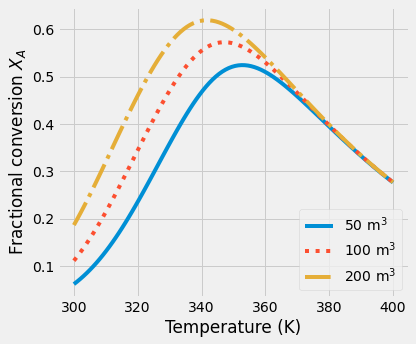

In [8]:
labels = ['50 m$^3$', '100 m$^3$', '200 m$^3$']
lss = ['-', ':', '-.']

fig, ax = plt.subplots(figsize=(6, 5))
for i, (label, ls) in enumerate(zip(labels, lss)):
    ax.plot(Temperatures, Conv[:,i], label=label, ls=ls)

ax.set_xlabel('Temperature (K)') 
ax.set_ylabel('Fractional conversion $X_A$') 
plt.legend(loc=0, title_fontsize='small')
plt.tight_layout()
plt.show()
